# Chcek image data from Pingfan

In [1]:
import scipy.io
import sys
import h5py
import numpy as np
import mat73
import torch
import matplotlib.pyplot as plt
from torch.utils.data import random_split, DataLoader, Dataset
!pwd

/mnt/ssd/jj/Research/cauMedical/lightning_bolts/script


In [15]:
file = 'subject05_MRIs.mat'
file_name = '/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_by_subject/'+ file
data_dict = mat73.loadmat(file_name)

In [22]:
for i in range(10):
    print(data_dict['X_all'][i][100, 100, :10])

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[-6.4557095+3.9529818e-16j -6.7987375+4.1630261e-16j
 -7.10311  +4.3494004e-16j -7.364653 +4.5095494e-16j
 -7.584611 +4.6442351e-16j -7.760333 +4.7518342e-16j
 -7.8927   +4.8328841e-16j -7.980504 +4.8866495e-16j
 -8.016409 +4.9086343e-16j -8.018732 +4.9100573e-16j]
[-6.3926907+3.9143942e-16j -6.7313704+4.1217753e-16j
 -7.0317106+4.3056808e-16j -7.289607 +4.4635968e-16j
 -7.5063257+4.5962988e-16j -7.679271 +4.7021981e-16j
 -7.8093314+4.7818366e-16j -7.8953414+4.8345014e-16j
 -7.93004  +4.8557492e-16j -7.9315643+4.8566826e-16j]
[ -9.581327+5.8668710e-16j -10.145839+6.2125340e-16j
 -10.650372+6.5214718e-16j -11.085169+6.7877075e-16j
 -11.444583+7.0077852e-16j -11.719929+7.1763871e-16j
 -11.907321+7.2911294e-16j -12.000949+7.3484608e-16j
 -11.987263+7.3400810e-16j -11.89366 +7.2827670e-16j]
[ -9.177209+5.6194193e-16j  -9.681853+5.9284249e-16j
 -10.127474+6.2012891e-16j -10.506042+6.4330951e-16j
 -10.815266+6.6224403e-1

In [16]:
print(file)
print()
print('<Length>')
for i in data_dict.keys():
    print(i, ' : ', len(data_dict[str(i)]) ) #, data_dict[i][0].shape)

subject44_MRIs.mat

<Length>
LUT  :  3
Params  :  9
X_all  :  10
Y_all  :  10
sampling_matrices  :  10


In [24]:
print(data_dict['Params'].keys())
print(len(data_dict['LUT'][0]), data_dict['LUT'][0][0].shape)
print(data_dict['X_all'][0].shape)
print(data_dict['Y_all'][0].shape)
print(data_dict['sampling_matrices'][0].shape)

dict_keys(['L', 'N', 'PDmax', 'RFpulses', 'T1max', 'T2max', 'TE', 'TR', 'k_space_undersampling_ratio'])
10 (128, 128)
(128, 128, 1000)
(128, 128, 1000)
(128, 128, 1000)


In [64]:
print('< Params >')
one = ['L', 'N', 'PDmax', 'T1max', 'T2max', 'TE', 'k_space_undersampling_ratio']
for i in data_dict['Params'].keys():
    if i in one:
        print(i, data_dict['Params'][i])
    else:
        print(i, data_dict['Params'][i].shape)

< Params >
L 1000.0
N 128.0
PDmax 149.21663
RFpulses (1000,)
T1max 5002.3457
T2max 511.01376
TE 10.0
TR (1000,)
k_space_undersampling_ratio 0.15


# Plot some data

### X_all, Y_all

/mnt/ssd/jj/anaconda3/envs/agpu_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/mnt/ssd/jj/anaconda3/envs/agpu_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


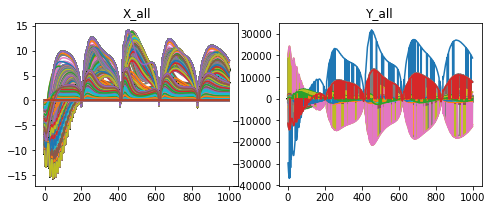

In [21]:
# Show m number of sequence
x = data_dict['X_all'][9]
y = data_dict['Y_all'][9]
n = 0; m = 128
x_plot = x[n:n+m, n:n+m, :].reshape(m*m, -1).T
y_plot = y[n:n+m, n:n+m, :].reshape(m*m, -1).T

# plot
plt.figure(figsize = (8,3) )
plt.subplot(1,2,1)
plt.title('X_all')
plt.plot(x_plot)
plt.subplot(1,2,2)
plt.title('Y_all')
plt.plot(y_plot)
plt.show()

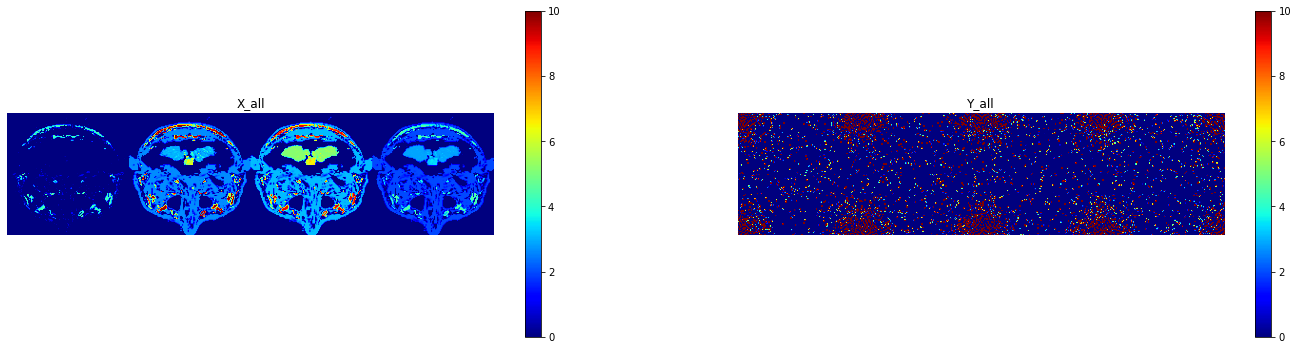

In [39]:
# show simulated MRI contrasts
x_torch = torch.Tensor(x)
y_torch = torch.Tensor(y)

# x
plt.figure(figsize = (24,6))
plt.subplot(1,2,1)
plt.imshow(torch.hstack((np.real(x_torch[:,:,40]), 
                      np.real(x_torch[:,:,90]), 
                      np.real(x_torch[:,:,140]),
                      np.real(x_torch[:,:,190]),)), cmap = 'jet')
plt.colorbar()
plt.clim(0,10)
plt.axis('off') 
plt.title('X_all')
plt.grid(True)

# y
plt.subplot(1,2,2)
plt.imshow(torch.hstack((np.real(y_torch[:,:,40]), 
                      np.real(y_torch[:,:,90]), 
                      np.real(y_torch[:,:,140]),
                      np.real(y_torch[:,:,190]),)), cmap = 'jet')
plt.colorbar()
plt.clim(0,10)
plt.axis('off') 
plt.title('Y_all')
plt.grid(True)
plt.show()

### (T1, T2, PD) from LUT

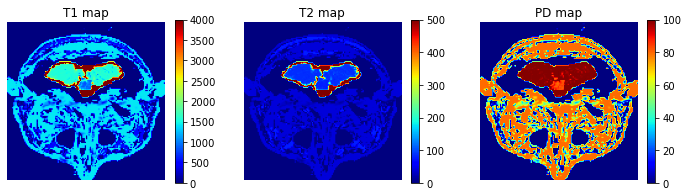

In [46]:
T1_image = data_dict['LUT'][0][0]
T2_image = data_dict['LUT'][1][0]
PD_image = data_dict['LUT'][2][0]

# show T1, T2, PD maps
plt.figure(figsize = (12,3))
plt.subplot(1,3,1)
plt.imshow(T1_image, cmap = 'jet')
plt.colorbar()
plt.clim(0,4000)
plt.axis('off') 
plt.title('T1 map')

plt.subplot(1,3,2)
plt.imshow(T2_image, cmap = 'jet')
plt.colorbar()
plt.clim(0,500)
plt.axis('off') 
plt.title('T2 map')

plt.subplot(1,3,3)
plt.imshow(PD_image, cmap = 'jet')
plt.colorbar()
plt.clim(0,100)
plt.axis('off') 
plt.title('PD map')
# plt.savefig("T12_Maps.png",bbox_inches='tight',transparent = True,pad_inches = 0,dpi=200)
plt.show()

### T1, T2 histogram (for spliting train, test set)

< subject04 >


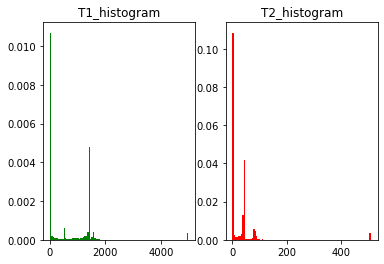

In [81]:
num_bins = 100

# T1
T1_image = data_dict['LUT'][0][0]
T1_image = T1_image.reshape(128*128,1)
plt.subplot(1,2,1)
plt.title('T1_histogram')
plt.hist(T1_image, num_bins, density = 1, color ='green')

# T2
T2_image = data_dict['LUT'][1][0]
T2_image = T2_image.reshape(128*128,1)
plt.subplot(1,2,2)
plt.title('T2_histogram')
plt.hist(T2_image, num_bins, density = 1, color ='red')

print('< subject04 >')
plt.show()

# Dataset : load from h5py

In [7]:
class PingImgDataset_Phantom(Dataset):
    """
    This get item by slice
    """

    # Input : T1T2, RF, TE, TR
    def __init__(self, mode='train'):
        """
        This data already done transformation
        So now : (need_T1T2_logscale=True, need_TETR_second=True, need_RF_degree=True)
        """

        # load file
        path = "/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_all/"
        sl_file = "test_all_MRIs" if "test" in mode else "train_all_MRIs"
        sl_file_name = path + sl_file
        data_h5py = h5py.File(sl_file_name + ".h5", "r")
        self.D = data_h5py["X_all"]
        self.labels = data_h5py["labels"]

    def __len__(self):
        return len(self.D)

    def __getitem__(self, idx):
        return self.D[idx], self.labels[idx]

In [8]:
a = PingImgDataset_Phantom(mode='train')
for i in range(10):
    d, l = a.__getitem__(i)
    print(l.shape)

(5, 1000)
(5, 1000)
(5, 1000)
(5, 1000)
(5, 1000)
(5, 1000)
(5, 1000)
(5, 1000)
(5, 1000)
(5, 1000)


# Cat 3 numpy arrays into one h5py file

In [10]:
path = "/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_all/"
te = np.load(path+'test_all_MRIs.npz')
tr1 = np.load(path+'train_all_MRIs_1.npz')
tr2 = np.load(path+'train_all_MRIs_2.npz')
print(te['X_all'].shape)

# D = np.concatenate((tr1['X_all'], tr2['X_all'], te['X_all']))
# label = np.concatenate((tr1['labels'], tr2['labels'], te['labels']))

In [25]:
hf = h5py.File(path + "all_MRIs.h5", "w")
hf.create_dataset("X_all", data=te['X_all'], compression="gzip", chunks=True, maxshape=(None,1000))
hf.create_dataset("labels", data=te['labels'], compression="gzip", chunks=True, maxshape=(None,5, 1000))
hf.close()

In [26]:
hf = h5py.File(path + "all_MRIs.h5", 'a')

hf["X_all"].resize((hf["X_all"].shape[0] + tr1['X_all'].shape[0]), axis = 0)
hf["X_all"][-tr1['X_all'].shape[0]:] = tr1['X_all']

hf["X_all"].resize((hf["X_all"].shape[0] + tr2['X_all'].shape[0]), axis = 0)
hf["X_all"][-tr2['X_all'].shape[0]:] = tr2['X_all']

hf["labels"].resize((hf["labels"].shape[0] + tr1['labels'].shape[0]), axis = 0)
hf["labels"][-tr1['labels'].shape[0]:] = tr1['labels']

hf["labels"].resize((hf["labels"].shape[0] + tr2['labels'].shape[0]), axis = 0)
hf["labels"][-tr2['labels'].shape[0]:] = tr2['labels']

hf.close()

In [27]:
# check the saved file
path = "/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_all/"
hf = h5py.File(path + "all_MRIs.h5", "r")
hf['X_all'].shape

(1671168, 1000)

# Datamodule : change data shape

### Save by slice

In [29]:
D = {} # D : (sub, slice, 128*128, 1000)
labels = {} # labels : (sub, slice, 128*128, (T1, T2)) = ()


subject_list = ['44'] #['04', '05', '06', '18']
n_slice_per_subject=12

L = 1000; subsamp = 1; len_seq = L//subsamp
need_T1T2_logscale = True
is_split_range_T1T2 = False; T1_condition_threshold = 1000; T2_condition_threshold = 50;
need_RF_degree = True
need_TETR_second = True



mode = "train"


for i in range(len(subject_list)):
    file = 'subject'+ str(subject_list[i]) +'_MRIs.mat'
    file_name = '/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_by_subject/'+ file
    data_dict = mat73.loadmat(file_name)
    
    for s in range(n_slice_per_subject):
        
        if s>len(data_dict['X_all'])-1:
            continue
        
        # X_all(fully sampled image sequence)
        D_slice = torch.from_numpy(data_dict['X_all'][s][:, 0:L:subsamp])# (128, 128, 1000)
        D_slice = torch.flatten(D_slice, 0, 1)# (128*128, 1000)
        D_slice = torch.nn.functional.normalize(D_slice, p=2.0, dim=1)
        
        # LUT (T1,T2,PD)
        T1 = torch.from_numpy(data_dict['LUT'][0][s]).unsqueeze(-1)# (128, 128, 1)
        T2 = torch.from_numpy(data_dict['LUT'][1][s]).unsqueeze(-1)# (128, 128, 1)
        labels_slice = torch.cat((T1, T2), -1) # (128, 128, 2)
        labels_slice = torch.flatten(labels_slice, 0, 1) #(128*128, 2)
        
        if is_split_range_T1T2:
            # Split train and test set : T1 0~2500, 2500~5000
            T1 = labels_slice[:, 0]
            T2 = labels_slice[:, 1]
            condition = (T1 < T1_condition_threshold) & (T2 < T2_condition_threshold) if "train" in mode else (T1 > T1_condition_threshold) & (T2 > T2_condition_threshold)
            labels_slice = labels_slice[condition] # (condition_num, 1, 1000)
            D_slice = D_slice[condition] # (condition_num, 1, 1000)
            print(labels_slice.shape, D_slice.shape)
        
        # T1T2 scale
        T1 = labels_slice[:, 0].unsqueeze(1).repeat(1, len_seq).unsqueeze(1) # (128*128, 1, 1000)
        T2 = labels_slice[:, 1].unsqueeze(1).repeat(1, len_seq).unsqueeze(1) # (128*128, 1, 1000)
        if need_T1T2_logscale == True:
            T1 = torch.log10(T1)
            T2 = torch.log10(T2)
            
        # RFpulses : (128*128, 1, 1000)
        num_seq = len(labels_slice)
        RFpulses = torch.from_numpy(data_dict['Params']['RFpulses'][0:L:subsamp]) # (1000,)
        RFpulses = RFpulses.repeat(num_seq, 1).unsqueeze(1) # (128*128, 1, 1000)
        
        # TR : (128*128, 1, 1000)
        TR = torch.from_numpy(data_dict['Params']['TR'][0:L:subsamp]) #(1000, )
        TR = TR.repeat(num_seq, 1).unsqueeze(1) # (128*128, 1, 1000)
        
        # TE : (128*128, 1, 1000)
        TE = torch.ones(num_seq, 1, L//subsamp) * data_dict['Params']['RFpulses'] # (128*128, 1, 1000)
        
        # RFpulses, TR, TE scale
        if need_RF_degree == True:
            RFpulses = RFpulses * 180 / torch.pi
            
        if need_TETR_second == True:
            TR = TR / 1000
            TE = TE / 1000
        
        # Concat
        labels_slice = torch.cat((RFpulses, T1, T2, TE, TR), 1) # (condition, 5, 1000)
        
        # Save
        sl_file = 'slice'+ str((n_slice_per_subject*i)+s) +'_MRIs'
        sl_file_name = '/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_by_slice/'+ sl_file
        np.savez(sl_file_name, X_all_slice=D_slice, labels_slice=labels_slice)
        print(sl_file)
        

    
    
    

slice0_MRIs
slice1_MRIs
slice2_MRIs
slice3_MRIs
slice4_MRIs
slice5_MRIs
slice6_MRIs
slice7_MRIs
slice8_MRIs
slice9_MRIs


### Load file by slice

In [20]:
index = 1000
slice_index = index//(128*128)# from (12slice*10subject=12total slice)
pixel_index = index%(128*128) # from (128*128)
print(index, slice_index, pixel_index)

sl_file ='slice'+ str(slice_index) +'_MRIs'
sl_file_name = '/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_by_slice/'+ sl_file
d = np.load(sl_file_name+'.npz')
print(d['X_all_slice'].shape, d['labels_slice'].shape)
print(d['X_all_slice'][pixel_index].shape, d['labels_slice'][pixel_index].shape)

1000 0 1000
(16384, 1000) (16384, 5, 1000)
(1000,) (5, 1000)


In [37]:
slice_num_now=0
subject_list=[1,2,3,4]
leng = [12,10,12,10]
n_slice_per_subject=12
for i in range(len(subject_list)):
    for s in range(n_slice_per_subject):
        if s>leng[i]:
            continue 
        # Update slice_num_now
        slice_num_now += 1
        print(slice_num_now)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


### save all in one

In [164]:
import scipy.io
import sys
import h5py
import numpy as np
import mat73
import torch
import matplotlib.pyplot as plt

D = []  # D : (sub, slice, 128*128, 1000)
labels = []  # labels : (sub, slice, 128*128, (T1, T2)) = ()


subject_list = ["44"]#, "05", "06", "18", "20", "38", "41", "42", "43", "44"]
n_slice_per_subject = 1 #12
L = 1000
subsamp = 1
len_seq = L // subsamp
need_T1T2_logscale = True
is_split_range_T1T2 = False
T1_condition_threshold = 1000
T2_condition_threshold = 50
need_RF_degree = True
need_TETR_second = True
mode = "train"
slice_num_now = 0

########
is_save_train_test = False
########


for i in range(len(subject_list)):
    file = "subject" + str(subject_list[i]) + "_MRIs.mat"
    file_name = "/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_by_subject/" + file
    data_dict = mat73.loadmat(file_name)

    for s in range(n_slice_per_subject):

        if s > len(data_dict["X_all"]) - 1:  # some subjects only have 10 slices instead of 12 slices
            continue

        # X_all(fully sampled image sequence)
        D_slice = torch.from_numpy(data_dict["X_all"][s][:, 0:L:subsamp])  # (128, 128, 1000)
        D_slice = torch.flatten(D_slice, 0, 1)  # (128*128, 1000)
        D_slice = np.real(D_slice)
        D_slice = torch.nn.functional.normalize(D_slice, p=2.0, dim=1)

        # LUT (T1,T2,PD)
        T1 = torch.from_numpy(data_dict["LUT"][0][s]).unsqueeze(-1)  # (128, 128, 1)
        T2 = torch.from_numpy(data_dict["LUT"][1][s]).unsqueeze(-1)  # (128, 128, 1)
        labels_slice = torch.cat((T1, T2), -1)  # (128, 128, 2)
        labels_slice = torch.flatten(labels_slice, 0, 1)  # (128*128, 2)

        if is_split_range_T1T2:
            # Split train and test set : T1 0~2500, 2500~5000
            T1 = labels_slice[:, 0]
            T2 = labels_slice[:, 1]
            condition = (
                (T1 < T1_condition_threshold) & (T2 < T2_condition_threshold)
                if "train" in mode
                else (T1 > T1_condition_threshold) & (T2 > T2_condition_threshold)
            )
            labels_slice = labels_slice[condition]  # (condition_num, 1, 1000)
            D_slice = D_slice[condition]  # (condition_num, 1, 1000)
            print(labels_slice.shape, D_slice.shape)

        # T1T2 scale
        T1 = labels_slice[:, 0].unsqueeze(1).repeat(1, len_seq).unsqueeze(1)  # (128*128, 1, 1000)
        T2 = labels_slice[:, 1].unsqueeze(1).repeat(1, len_seq).unsqueeze(1)  # (128*128, 1, 1000)
        if need_T1T2_logscale == True:
            # replace -inf with -100
            T1_log = torch.nan_to_num(torch.log10(T1), neginf=-100)
            T2_log = torch.nan_to_num(torch.log10(T2), neginf=-100)
            # Get index larger than -100
            T1_idx_larger_than_n100 = torch.where(T1_log > -100)[0]
            T2_idx_larger_than_n100 = torch.where(T2_log > -100)[0]

            # replace -100 with minimum value
            T1_min = torch.min(T1_log[T1_idx_larger_than_n100])
            T1 = torch.where(T1_log == -100, T1_min, T1_log)
            T2_min = torch.min(T2_log[T2_idx_larger_than_n100])
            T2 = torch.where(T2_log == -100, T2_min, T2_log)

        # RFpulses : (128*128, 1, 1000)
        num_seq = len(labels_slice)
        RFpulses = torch.from_numpy(np.imag(data_dict["Params"]["RFpulses"][0:L:subsamp]))  # (1000,)
        RFpulses = RFpulses.repeat(num_seq, 1).unsqueeze(1)  # (128*128, 1, 1000)

        # TR : (128*128, 1, 1000)
        TR = torch.from_numpy(data_dict["Params"]["TR"][0:L:subsamp])  # (1000, )
        TR = TR.repeat(num_seq, 1).unsqueeze(1)  # (128*128, 1, 1000)

        # TE : (128*128, 1, 1000)
        TE = torch.ones(num_seq, 1, L // subsamp) * data_dict["Params"]["TE"]  # (128*128, 1, 1000)

        # RFpulses, TR, TE scale
        if need_RF_degree == True:
            RFpulses = RFpulses * 180 / torch.pi

        if need_TETR_second == True:
            TR = TR / 1000
            TE = TE / 1000

        # Concat
        labels_slice = torch.cat((RFpulses, T1, T2, TE, TR), 1)  # (condition, 5, 1000)

        # Concat for all
        if len(D) < 1:
            D = D_slice
            labels = labels_slice
        else:
            D = torch.cat((D, D_slice), 0)
            labels = torch.cat((labels, labels_slice), 0)
            print(slice_num_now, D.shape, labels.shape)

        # Update slice_num
        slice_num_now += 1


In [176]:
RFpulses = torch.from_numpy(np.imag(data_dict["Params"]["RFpulses"][0:L:subsamp]))
is_RFpulses_complex = np.iscomplex(RFpulses).sum()>0
print(is_RFpulses_complex)

RFpulses_cpx = data_dict["Params"]["RFpulses"][0:L:subsamp]
is_RFpulses_complex = np.iscomplex(RFpulses_cpx).sum()>0
print(is_RFpulses_complex)

if is_RFpulses_complex:
    print('convert')
    RFpulses_cpx = torch.from_numpy(np.imag(RFpulses_cpx))
    print(np.iscomplex(RFpulses_cpx).sum()>0)

False
True
convert
False


In [177]:
a = torch.tensor([1,2,3])
np.iscomplex(a)

array([False, False, False])

tensor([[0.7456, 0.7456, 0.7456,  ..., 0.7456, 0.7456, 0.7456],
        [0.7456, 0.7456, 0.7456,  ..., 0.7456, 0.7456, 0.7456],
        [0.7456, 0.7456, 0.7456,  ..., 0.7456, 0.7456, 0.7456],
        ...,
        [3.1521, 3.1521, 3.1521,  ..., 3.1521, 3.1521, 3.1521],
        [3.1521, 3.1521, 3.1521,  ..., 3.1521, 3.1521, 3.1521],
        [0.7456, 0.7456, 0.7456,  ..., 0.7456, 0.7456, 0.7456]],
       dtype=torch.float64) torch.Size([16384, 1000])


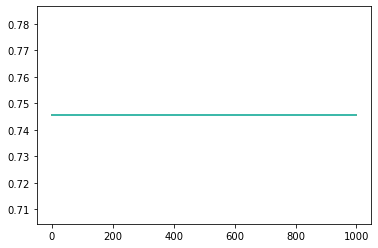

In [170]:
# labels:(RFpulses, T1, T2, TE, TR)
px = D
px = labels[:,1,:]


print(px[0:10000:100], px.shape)
plt.plot(px[0:100:1].T)

In [122]:
subject_list = ["44"]
i=0
file = "subject" + str(subject_list[i]) + "_MRIs.mat"
file_name = "/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_by_subject/" + file
data_dict = mat73.loadmat(file_name)

s=3; L=1000; subsamp=1
# X_all(fully sampled image sequence)
D_slice = torch.from_numpy(data_dict["X_all"][s][:, 0:L:subsamp])  # (128, 128, 1000)
D_slice = torch.flatten(D_slice, 0, 1)  # (128*128, 1000)
D_slice = np.real(D_slice)
D_slice = torch.nn.functional.normalize(D_slice, p=2.0, dim=1)

# LUT (T1,T2,PD)
T1 = torch.from_numpy(data_dict["LUT"][0][s]).unsqueeze(-1)  # (128, 128, 1)
T2 = torch.from_numpy(data_dict["LUT"][1][s]).unsqueeze(-1)  # (128, 128, 1)
labels_slice = torch.cat((T1, T2), -1)  # (128, 128, 2)
labels_slice = torch.flatten(labels_slice, 0, 1)  # (128*128, 2)

T1 = labels_slice[:, 0]
T2 = labels_slice[:, 1]




In [135]:
# T1T2 scale
# T1 = labels_slice[:, 0].unsqueeze(1).repeat(1, len_seq).unsqueeze(1)  # (128*128, 1, 1000)
# T2 = labels_slice[:, 1].unsqueeze(1).repeat(1, len_seq).unsqueeze(1)  # (128*128, 1, 1000)
if need_T1T2_logscale == True:
    # replace -inf with -100
    T1_log = torch.nan_to_num(torch.log10(T1), neginf=-100)
    T2_log = torch.nan_to_num(torch.log10(T2), neginf=-100) 
    # Get index larger than -100
    T1_idx_larger_than_n100 = torch.where(T1_log > -100)[0]
    T2_idx_larger_than_n100 = torch.where(T2_log > -100)[0]
    
    # replace -100 with minimum value
    T1_min = torch.min(T1_log[T1_idx_larger_than_n100])
    T1 = torch.where(T1_log==-100, T1_min, T1_log)
    T2_min = torch.min(T2_log[T2_idx_larger_than_n100])
    T2 = torch.where(T2_log==-100, T2_min, T2_log) 

In [47]:
p = torch.randn((10,))
a = torch.tensor([1,2,3])
# np.delete(a, 3)
b = torch.tensor([3,3,3])
ind = np.intersect1d(a,b)
ind = torch.cat((a,b),0).unique()
p[ind].shape, ind

(torch.Size([3]), tensor([1, 2, 3]))

In [129]:
# T1T2 scale
# T1 = labels_slice[:, 0].unsqueeze(1).repeat(1, len_seq).unsqueeze(1)  # (128*128, 1, 1000)
# T2 = labels_slice[:, 1].unsqueeze(1).repeat(1, len_seq).unsqueeze(1)  # (128*128, 1, 1000)

# replace -inf with -100
T1_log = torch.nan_to_num(torch.log10(T1), neginf=-100)
T2_log = torch.nan_to_num(torch.log10(T2), neginf=-100)

# Get index that the value is -100
T1_idx_n100 = torch.where(T1_log != -100)[0]
T2_idx_n100 = torch.where(T2_log != -100)[0]
T1T2_idx_n100 = np.intersect1d(T1_idx_n100, T2_idx_n100)
print(T1T2_idx_n100.shape, T1T2_idx_n100[0], T1_idx_n100[0:3], T2_idx_n100[0:3])
# T1T2_idx_n100 = torch.cat((T1_idx_n100, T2_idx_n100),0).unique()
# T1_idx_larger_than_n100 = torch.where(T1_log > -100)[0]
# T2_idx_larger_than_n100 = torch.where(T2_log > -100)[0]
# T1T2_idx_larger_than_n100 = torch.cat((T1_idx_larger_than_n100, T2_idx_larger_than_n100),0).unique()

# Get rid of -100 
D_slice_r = D_slice[T1T2_idx_n100]
labels_slice_r = labels_slice[T1T2_idx_n100]
# D_slice_r = torch.where(D_slice!=-100000)[1]
# labels_slice_r = labels_slice.clone(); labels_slice_r[T1T2_idx_n100] = -1000
# labels_slice_r = torch.where(labels_slice_r!=-100000)[1]

T1_r = labels_slice_r[:, 0]
T2_r = labels_slice_r[:, 1]

# # replace -100 with minimum value
# T1_min = torch.min(T1_log[T1T2_idx_larger_than_n100]); T1_min_idx = torch.argmin(T1_log[T1T2_idx_larger_than_n100])
# T2_min = torch.min(T2_log[T1T2_idx_larger_than_n100]); T2_min_idx = torch.argmin(T2_log[T1T2_idx_larger_than_n100])

# T1_r = T1_log.clone(); T1_r[T1T2_idx_n100] = T1_min
# T2_r = T2_log.clone(); T2_r[T1T2_idx_n100] = T2_min

# replace D_slice
# D_slice_min = 
# D_slice_r = D_slice[]

(10916,) 195 tensor([195, 585, 693]) tensor([195, 585, 693])


torch.Size([16384]) torch.Size([16384]) torch.Size([16384]) torch.Size([10916]) torch.Size([10916, 1000]) torch.Size([10916])


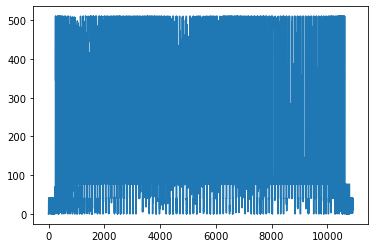

In [134]:
print(T2.shape, T1.shape, T1_log.shape, T1_r.shape, D_slice_r.shape, T2_r.shape)
plt.plot(torch.real(T2_r))


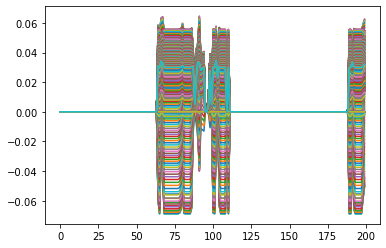

In [82]:
plt.plot(torch.real(D_slice[1000:1200]))

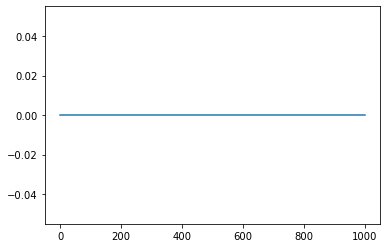

In [143]:
RFpulses = torch.from_numpy(data_dict["Params"]["RFpulses"][0:L:subsamp])
RFpulses = RFpulses * 180 / torch.pi
TR = torch.from_numpy(data_dict["Params"]["TR"][0:L:subsamp])  # (1000, )
num_seq = len(labels_slice)
TE = torch.ones(num_seq, L // subsamp) * data_dict["Params"]["TE"]

plt.plot(torch.real(RFpulses))
# print(RFpulses[100:500], RFpulses.shape)

# print(TE)

# Check dataset

In [26]:
class PingImgDataset_Phantom(Dataset):
    """
    This get item by slice
    """

    # Input : T1T2, RF, TE, TR
    def __init__(self, mode="train"):
        """
        This data already done transformation
        So now : (need_T1T2_logscale=True, need_TETR_second=True, need_RF_degree=True)
        """

        # load file
        path = "/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/again_image_all/"
        if "test" in mode:
            sl_file = "test_all_MRIs"
        elif "train" in mode:
            sl_file = "train_all_MRIs"
        elif "none" in mode:
            sl_file = "all_MRIs"
        sl_file_name = path + sl_file
        data_h5py = h5py.File(sl_file_name + ".h5", "r")
        self.D = data_h5py["X_all"]
        self.labels = data_h5py["labels"]
        
#         self.D = self.D[0:len(self.D):100]

    def __len__(self):
        return len(self.D)

    def __getitem__(self, idx):
        return self.D[idx], self.labels[idx]

In [29]:
327680/(128*128)
# 128*128*8

20.0

In [27]:
# torch.cat((RFpulses, T1, T2, TE, TR), 1) 
a = PingImgDataset_Phantom(mode='test')
print(a.D.shape, a.labels.shape)
print()
for i in range(60000, 61000, 100):
    d, l = a.__getitem__(i)
    print(i)
    l_t = l.transpose(0,1)
    print(l[0, 1:3])
    print(l[3:5, 1:3])
    print(d)
    print()

(327680, 1000) (327680, 5, 1000)

60000
[6.41 6.88]
[[0.01       0.01      ]
 [0.01314382 0.01311483]]
[-4.42730673e-02 -4.67247441e-02 -4.88920622e-02 -5.07355370e-02
 -5.22424467e-02 -5.33809401e-02 -5.41453809e-02 -5.45172356e-02
 -5.44442460e-02 -5.40538728e-02 -5.32496013e-02 -5.21213114e-02
 -5.07173650e-02 -4.90850322e-02 -4.72918674e-02 -4.54029106e-02
 -4.34502736e-02 -4.15627323e-02 -3.98140252e-02 -3.82634588e-02
 -3.69229130e-02 -3.58758047e-02 -3.51361483e-02 -3.46922390e-02
 -3.44777927e-02 -3.45231555e-02 -3.46430913e-02 -3.48825864e-02
 -3.50775011e-02 -3.51898447e-02 -3.51179317e-02 -3.48493941e-02
 -3.43532860e-02 -3.35979611e-02 -3.26444469e-02 -3.15343738e-02
 -3.03036273e-02 -2.90532950e-02 -2.78229658e-02 -2.66954359e-02
 -2.57012807e-02 -2.48267241e-02 -2.40657255e-02 -2.34070569e-02
 -2.27969699e-02 -2.21644491e-02 -2.14855466e-02 -2.07068734e-02
 -1.98193025e-02 -1.88441556e-02 -1.77983157e-02 -1.67034063e-02
 -1.56064248e-02 -1.45567628e-02 -1.35733513e-02 -1.

60500
[6.41 6.88]
[[0.01       0.01      ]
 [0.01314382 0.01311483]]
[-4.11835089e-02 -4.33934033e-02 -4.53295149e-02 -4.69556898e-02
 -4.82600406e-02 -4.92135920e-02 -4.98115346e-02 -5.00375628e-02
 -4.98448499e-02 -4.93518971e-02 -4.84722480e-02 -4.72905822e-02
 -4.58541773e-02 -4.42092940e-02 -4.24214303e-02 -4.05534431e-02
 -3.86389717e-02 -3.67983617e-02 -3.51019241e-02 -3.36054899e-02
 -3.23216543e-02 -3.13252360e-02 -3.06275710e-02 -3.02146692e-02
 -3.00226994e-02 -3.00720315e-02 -3.01908329e-02 -3.04107592e-02
 -3.05790026e-02 -3.06549612e-02 -3.05443201e-02 -3.02333981e-02
 -2.96955667e-02 -2.89065540e-02 -2.79258434e-02 -2.67979614e-02
 -2.55640522e-02 -2.43209880e-02 -2.31116638e-02 -2.20127944e-02
 -2.10534111e-02 -2.02198420e-02 -1.95016973e-02 -1.88813955e-02
 -1.83042940e-02 -1.77018810e-02 -1.70463342e-02 -1.62890162e-02
 -1.54218078e-02 -1.44652668e-02 -1.34398900e-02 -1.23725673e-02
 -1.13106230e-02 -1.03008449e-02 -9.36259050e-03 -8.48810840e-03
 -7.68926786e-03 -6.9

In [25]:
l_t = l.transpose(0,1)
l[0, 1:3]

array([6.41, 6.88])

In [250]:
a.labels.shape, d.dtype, torch.from_numpy(d).dtype

((1671168, 5, 1000), dtype('<f4'), torch.float32)

In [219]:
(1671168)/(128*128)
(128*128)

102.0

In [242]:
from torch.nn import functional as F
q = torch.ones((2,3)).to(torch.float32)*4; q.requires_grad_()
w = torch.ones((2,3)).to(torch.float64); w.requires_grad_()
los = F.mse_loss(q*w, w, reduction="mean")
los.backward()

In [243]:
q.to(torch.float)

tensor([[4., 4., 4.],
        [4., 4., 4.]], requires_grad=True)

In [ ]:
import scipy.io
import sys
import h5py
import numpy as np
import mat73
import torch
import matplotlib.pyplot as plt

D = []  # D : (sub, slice, 128*128, 1000)
labels = []  # labels : (sub, slice, 128*128, (T1, T2)) = ()


subject_list = ["04", "05", "06", "18", "20", "38", "41", "42", "43", "44"]
n_slice_per_subject = 12
L = 1000
subsamp = 1
len_seq = L // subsamp
need_T1T2_logscale = True
is_split_range_T1T2 = False
T1_condition_threshold = 1000
T2_condition_threshold = 50
need_RF_degree = True
need_TETR_second = True
mode = "train"
slice_num_now = 0


for i in range(len(subject_list)):
    file = "subject" + str(subject_list[i]) + "_MRIs.mat"
    file_name = "/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_by_subject/" + file
    data_dict = mat73.loadmat(file_name)

    for s in range(n_slice_per_subject):

        if s > len(data_dict["X_all"]) - 1:  # some subjects only have 10 slices instead of 12 slices
            continue

        # X_all(fully sampled image sequence)
        D_slice = torch.from_numpy(data_dict["X_all"][s][:, 0:L:subsamp])  # (128, 128, 1000)
        D_slice = torch.flatten(D_slice, 0, 1)  # (128*128, 1000)
        D_slice = np.real(D_slice)
        D_slice = torch.nn.functional.normalize(D_slice, p=2.0, dim=1)

        # LUT (T1,T2,PD)
        T1 = torch.from_numpy(data_dict["LUT"][0][s]).unsqueeze(-1)  # (128, 128, 1)
        T2 = torch.from_numpy(data_dict["LUT"][1][s]).unsqueeze(-1)  # (128, 128, 1)
        labels_slice = torch.cat((T1, T2), -1)  # (128, 128, 2)
        labels_slice = torch.flatten(labels_slice, 0, 1)  # (128*128, 2)

        if is_split_range_T1T2:
            # Split train and test set : T1 0~2500, 2500~5000
            T1 = labels_slice[:, 0]
            T2 = labels_slice[:, 1]
            condition = (
                (T1 < T1_condition_threshold) & (T2 < T2_condition_threshold)
                if "train" in mode
                else (T1 > T1_condition_threshold) & (T2 > T2_condition_threshold)
            )
            labels_slice = labels_slice[condition]  # (condition_num, 1, 1000)
            D_slice = D_slice[condition]  # (condition_num, 1, 1000)
            print(labels_slice.shape, D_slice.shape)

        # T1T2 scale
        T1 = labels_slice[:, 0].unsqueeze(1).repeat(1, len_seq).unsqueeze(1)  # (128*128, 1, 1000)
        T2 = labels_slice[:, 1].unsqueeze(1).repeat(1, len_seq).unsqueeze(1)  # (128*128, 1, 1000)
        if need_T1T2_logscale == True:
            # replace -inf with -100
            T1_log = torch.nan_to_num(torch.log10(T1), neginf=-100)
            T2_log = torch.nan_to_num(torch.log10(T2), neginf=-100)
            # Get index larger than -100
            T1_idx_larger_than_n100 = torch.where(T1_log > -100)[0]
            T2_idx_larger_than_n100 = torch.where(T2_log > -100)[0]

            # replace -100 with minimum value
            T1_min = torch.min(T1_log[T1_idx_larger_than_n100])
            T1 = torch.where(T1_log == -100, T1_min, T1_log)
            T2_min = torch.min(T2_log[T2_idx_larger_than_n100])
            T2 = torch.where(T2_log == -100, T2_min, T2_log)

        # RFpulses : (128*128, 1, 1000) : Use only imaginary part, as real parts are all zeros.
        num_seq = len(labels_slice)
        RFpulses = data_dict["Params"]["RFpulses"][0:L:subsamp]  # (1000,)
        is_RFpulses_complex = np.iscomplex(RFpulses).sum() > 0
        if is_RFpulses_complex:
            RFpulses = torch.from_numpy(np.imag(RFpulses))
        RFpulses = RFpulses.repeat(num_seq, 1).unsqueeze(1)  # (128*128, 1, 1000)

        # TR : (128*128, 1, 1000)
        TR = torch.from_numpy(data_dict["Params"]["TR"][0:L:subsamp])  # (1000, )
        TR = TR.repeat(num_seq, 1).unsqueeze(1)  # (128*128, 1, 1000)

        # TE : (128*128, 1, 1000)
        TE = torch.ones(num_seq, 1, L // subsamp) * data_dict["Params"]["TE"]  # (128*128, 1, 1000)

        # RFpulses, TR, TE scale
        if need_RF_degree == True:
            RFpulses = RFpulses * 180 / torch.pi

        if need_TETR_second == True:
            TR = TR / 1000
            TE = TE / 1000

        # Concat
        labels_slice = torch.cat((RFpulses, T1, T2, TE, TR), 1)  # (condition, 5, 1000)

        # Concat for all
        if len(D) < 1:
            D = D_slice
            labels = labels_slice
        else:
            D = torch.cat((D, D_slice), 0)
            labels = torch.cat((labels, labels_slice), 0)
        print(slice_num_now, D.shape, labels.shape)

        # Save
        if slice_num_now == 80:
            sl_file = "train_all_MRIs"  # + str(slice_num_now) + "_MRIs"
            sl_file_name = (
                "/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_all/" + sl_file
            )

            hf = h5py.File(sl_file_name + ".h5", "w")
            hf.create_dataset("X_all", data=D, compression="gzip", chunks=True)
            hf.create_dataset("labels", data=labels, compression="gzip", chunks=True)
            hf.close()
            all_D = D
            D = []
            all_labels = labels
            labels = []
            print(sl_file)

        if slice_num_now > 100:
            sl_file = "test_all_MRIs"  # + str(slice_num_now) + "_MRIs"
            sl_file_name = (
                "/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_all/" + sl_file
            )

            hf = h5py.File(sl_file_name + ".h5", "w")
            hf.create_dataset("X_all", data=D, compression="gzip", chunks=True)
            hf.create_dataset("labels", data=labels, compression="gzip", chunks=True)
            hf.close()
            print(sl_file)

        if slice_num_now > 100:
            sl_file = "all_MRIs"  # + str(slice_num_now) + "_MRIs"
            sl_file_name = (
                "/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/image_all/" + sl_file
            )
            save_all_D = torch.cat((all_D, D), 0)
            save_all_labels = torch.cat((all_labels, labels), 0)
            hf = h5py.File(sl_file_name + ".h5", "w")
            hf.create_dataset("X_all", data=save_all_D, compression="gzip", chunks=True)
            hf.create_dataset("labels", data=save_all_labels, compression="gzip", chunks=True)
            hf.close()
            print(sl_file)

        # Update slice_num
        slice_num_now += 1


In [45]:
import torch
a = torch.randn((4,))
b = torch.randn((4,))
n_a = a*-1
n_b = b*-1
print((torch.nn.functional.cosine_similarity(a, b, dim=-1).abs()).shape)
print(torch.nn.functional.cosine_similarity(a, b, dim=1))
print(torch.nn.functional.cosine_similarity(n_a, b, dim=1))
print(torch.nn.functional.cosine_similarity(a, n_b, dim=1))
print(torch.nn.functional.cosine_similarity(n_a, n_b, dim=1))
print(torch.nn.functional.cosine_similarity(n_a, n_b, dim=1).abs())
print(torch.nn.functional.cosine_similarity(n_a.abs(), n_b.abs(), dim=1))

torch.Size([])


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [25]:
a = torch.tensor((1e-10, 1e-12))
print(a)
a_norm = torch.nn.functional.normalize(a, dim=0, p=1)
print(a_norm)
a_norm = torch.nn.functional.normalize(a, dim=0, p=2)
print(a_norm)
print(a_norm.mean(), a.mean())

tensor([1.0000e-10, 1.0000e-12])
tensor([0.9901, 0.0099])
tensor([0.9999, 0.0100])
tensor(0.5050) tensor(5.0500e-11)


In [13]:
b>0
a, a[a>0]

(tensor([[ 4.3834e-01, -2.0562e-02, -1.0217e+00,  3.8499e-01,  2.7620e-04,
           1.5555e+00, -5.1609e-01,  1.0430e+00],
         [ 1.1329e+00, -3.1037e-01, -4.3548e-01,  2.0825e-02,  2.8790e-02,
          -5.7632e-01,  2.9136e-01, -2.5177e-01]]),
 tensor([4.3834e-01, 3.8499e-01, 2.7620e-04, 1.5555e+00, 1.0430e+00, 1.1329e+00,
         2.0825e-02, 2.8790e-02, 2.9136e-01]))

In [143]:
a = torch.randn((1,3)).abs()
a = torch.nn.functional.normalize(a,p=2)
torch.normal(mean=0.0, std=3+a), a

(tensor([[-0.0727,  3.8802,  7.1683]]), tensor([[0.8331, 0.3711, 0.4101]]))

## Register forward hook 

### Example

In [30]:
class ex:
    def __init__(self):
        self.linear_model = torch.nn.Linear(in_features=10, out_features=5)
        self.linear_model2 = torch.nn.Linear(in_features=5, out_features=2)
        self.linear_model.register_forward_hook(self.add_noise_and_save_outputs_hook())
        
        self.noise = 0
        

    # Register hook function
    def add_noise_and_save_outputs_hook(self):
        def fn(_, __, output):
            _hooked_features = output
            output = output * self.noise
            return output

        return fn



    def forward(self,x):
        x = self.linear_model(x)
        print(x)
        x = self.linear_model2(x)
        return x

a = ex()
x = torch.randn((3,10))
a.noise = 1000
a.forward(x)

0
0
tensor([[-0., -0., 0., -0., 0.],
        [0., -0., 0., -0., 0.],
        [-0., -0., -0., 0., 0.]], grad_fn=<MulBackward0>)
0


In [34]:
mask = torch.randn((5,)).abs()
mask = 1 - torch.nn.functional.normalize(mask, dim=0, p=2)  # Make it as probabiliy
mask_bern = torch.bernoulli(mask)
print(mask)
print(mask_bern)
var = 0.1 + (mask*0.1)
torch.normal(mean=0.0, std=var) * mask_bern

tensor([0.2109, 0.6689, 0.6368, 0.8507, 0.6630])
tensor([1., 0., 1., 1., 0.])


tensor([-0.0758,  0.0000,  0.1913, -0.0882,  0.0000])

# Mutual information

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
import torch.nn as nn
from torch.distributions import MultivariateNormal
from torch.autograd import Variable

from torchvision import datasets
from torchvision.transforms import transforms

import pytorch_lightning as pl
from pytorch_lightning import Trainer



In [125]:
EPS = 1e-6
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#device = 'cpu'
print("Device:", device)


class CustomSequential(nn.Sequential):
    def forward(self, *input):
        for module in self._modules.values():
            if isinstance(input, tuple):
                input = module(*input)
            else:
                input = module(input)
        return input
    
class ConcatLayer(nn.Module):
    def __init__(self, dim=1):
        super().__init__()
        self.dim = dim

    def forward(self, x, y):
        return torch.cat((x, y), self.dim)

class EMALoss(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, running_ema):
        ctx.save_for_backward(input, running_ema)
        input_log_sum_exp = input.exp().mean().log()

        return input_log_sum_exp

    @staticmethod
    def backward(ctx, grad_output):
        input, running_mean = ctx.saved_tensors
        grad = grad_output * input.exp().detach() / \
            (running_mean + EPS) / input.shape[0]
        return grad, None


def ema(mu, alpha, past_ema):
    return alpha * mu + (1.0 - alpha) * past_ema


def ema_loss(x, running_mean, alpha):
    print(torch.logsumexp(x, 0), math.log(x.shape[0]),'=====')
    t_exp = torch.exp(torch.logsumexp(x, 0) - math.log(x.shape[0])).detach()
    
    # Replace inf to maximum
#     T1_log = torch.nan_to_num(torch.log10(T1), neginf=-100)
#     T1_idx_larger_than_n100 = torch.where(T1_log > -100)[0]
#     T1_min = torch.min(T1_log[T1_idx_larger_than_n100])
#     T1 = torch.where(T1_log == -100, T1_min, T1_log)
        
    if running_mean == 0:
        running_mean = t_exp
    else:
        running_mean = ema(t_exp, alpha, running_mean.item())
    t_log = EMALoss.apply(x, running_mean)
    
    print(t_exp, t_log, '---')

    # Recalculate ema

    return t_log, running_mean

def forward(x, z, running_mean=None, alpha=None, T=None, z_marg=None):
    if z_marg is None:
        z_marg = z[torch.randperm(x.shape[0])]

    t = T(x, z).mean()
    t_marg = T(x, z_marg)

    second_term, running_mean = ema_loss(
        t_marg, running_mean, alpha)

    return -t + second_term

def get_mutual_information(v1, v2, T=None):
        """
        v1, v2 : (batch, 512)
        """
        running_mean = 0
        alpha = 0.1
        v1_dim = v1.shape[-1]
        v2_dim = v2.shape[-1]
        cat_v1_v2 = torch.cat((v1, v2), 1)

        if T is None:
            T = CustomSequential(
                torch.nn.Linear(v1_dim + v2_dim, 100),
                torch.nn.ReLU(),
                torch.nn.Linear(100, 100),
                torch.nn.ReLU(),
                torch.nn.Linear(100, 1),
            )

        v2_marg = v2[torch.randperm(v1.shape[0])]
        cat_v1_mv2 = torch.cat((v1, v2_marg), 1)

        t = T(cat_v1_v2).mean()
        t_marg = T(cat_v1_mv2)

        second_term, running_mean = ema_loss(t_marg, running_mean, alpha)
        print(second_term)

        return -t + second_term

Device: cuda


In [126]:
v1 = torch.randn((3,5))
v2 = v1.clone()*80 #torch.randn((3,5))

running_mean=0
alpha=0.1
x_dim=5
z_dim=5

T = CustomSequential(ConcatLayer(), nn.Linear(x_dim + z_dim, 100), nn.ReLU(),
                                  nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 1))
def identity(x):
    return x

# forward(v1,v2, running_mean=running_mean, alpha=alpha, T=T, z_marg=None)
get_mutual_information(v1,v2, T=identity)
# mu = MutualInformationEstimator(5, 5)


tensor([  1.1935,   1.8277,   0.9600,   1.0724,   1.1146,  44.6712, 116.1934,
         34.7734,  56.7405,  29.6600]) 1.0986122886681098 =====
tensor([1.0996e+00, 2.0732e+00, 8.7060e-01, 9.7411e-01, 1.0161e+00, 8.3821e+18,
               inf, 4.2148e+14, 1.4621e+24, 2.5354e+12]) tensor(inf) ---
tensor(inf)


tensor(inf)

In [103]:
ema_loss(torch.zeros_like(v1), 0, 0.1)

(tensor(0.), tensor([1., 1., 1., 1., 1.]))

In [128]:
np.exp(116)

2.3886906014249913e+50